## step1:Data load 

In [1]:
import lightgbm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,recall_score,precision_score,balanced_accuracy_score

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

inputfile = './data_processed/final_end.xlsx'
data = pd.read_excel(inputfile)
data = data[data.columns[1:]]
data.head()

,temperature_max,temperature_min,temperature_median,temperature_mean,temperature_std,heart_rate_max,heart_rate_min,heart_rate_median,heart_rate_mean,heart_rate_std,breath_rate_max,breath_rate_min,breath_rate_median,breath_rate_mean,breath_rate_std,systollic_pressure_max,systollic_pressure_min,systollic_pressure_median,systollic_pressure_mean,systollic_pressure_std,diastolic_pressure_max,diastolic_pressure_min,diastolic_pressure_median,diastolic_pressure_mean,diastolic_pressure_std,oxygen_saturation_max,oxygen_saturation_min,oxygen_saturation_median,oxygen_saturation_mean,oxygen_saturation_std,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
0,37.6,35.9,36.5,36.535366,0.426693,106,40,66.0,69.048780,15.660678,39,11,20.0,19.951220,4.274248,226,116,158.0,161.609756,26.277604,129,39,64.0,68.451220,16.817945,100,78,100.0,99.109756,3.014394,1,67,3.3100,97.0,0.293333,89.166667,29.30,328.333333,26.533333,36.70,90.0,5.326667,72.0,17.60,8.033333,2.233333,0.133333,3.913333,0.876667,0.413333,0.116667,0.006667,13.6,8.60,5.00,27.50,29.0,1.8200,76.850,38.500,38.35,1.0050,9.54,27.3000,985.50,4.700000,5.0150,327.50,1.50,3.1000,1.100,1.1900,135.0,95.5,165.00,582.00,516.5,131.75,5.060,93.950,16.550,26.300,0.145,2.300,1.005,2.385,19.950000,13.10,1.1000,47.800,1.7400,22.80,1.4000,3.5000,8.2,1.5900,433.933333,9.753333,35000.000000,157.366667,1
1,37.5,35.0,36.4,36.509434,0.690113,100,50,66.0,65.339623,6.833018,24,14,18.0,17.358491,2.631863,158,62,135.0,131.641509,17.923013,112,43,60.0,61.641509,9.701495,100,92,99.0,98.849057,1.833410,0,87,4.4300,121.0,0.400000,91.200000,27.30,300.000000,17.000000,55.30,451.0,11.300000,92.2,4.60,3.200000,0.000000,0.000000,10.420000,0.520000,0.360000,0.000000,0.000000,4.7,2.10,2.60,9.00,10.0,1.1100,70.700,35.100,35.60,0.9900,5.92,6.1000,44.00,87.430000,0.8600,229.00,1.13,2.8400,1.240,1.2500,72.0,23.0,21.00,126.00,101.0,131.50,4.240,87.000,41.300,7.400,0.060,2.380,0.940,1.110,4.600000,11.10,0.8900,19.800,0.7100,17.40,1.0700,3.8400,5.0,1.7700,35.390000,1.870000,3339.000000,19.300000,1
2,37.3,36.0,37.1,36.754545,0.528905,100,51,61.5,67.954545,15.345163,24,16,20.0,20.636364,1.965063,188,87,165.0,157.272727,25.296681,80,23,68.0,63.409091,17.081483,100,97,99.0,99.090909,0.811177,1,69,3.4850,97.0,0.345000,98.550000,27.85,282.500000,32.300000,30.70,98.0,8.345000,94.7,4.00,1.250000,0.000000,0.050000,7.920000,0.320000,0.100000,0.000000,0.005000,5.8,2.70,3.10,44.00,43.5,0.9900,58.800,33.000,25.80,1.2800,17.00,8.1200,91.00,75.185000,1.3400,207.50,0.98,3.2000,1.415,1.3100,55.5,43.5,36.00,224.00,185.0,141.90,4.540,90.800,45.950,9.700,0.635,2.245,0.905,0.645,3.450000,10.50,0.8600,22.350,0.8000,17.80,1.0950,4.4150,2.7,0.7100,40.795000,1.770000,1386.000000,39.650000,1
3,36.8,36.2,36.5,36.579167,0.179320,100,56,63.0,62.916667,5.274357,22,14,16.0,16.208333,1.318074,122,71,83.5,86.416667,8.627140,74,35,39.0,40.125000,4.266273,100,100,100.0,100.000000,0.000000,0,51,2.0450,63.0,0.190000,94.350000,30.80,326.000000,19.050000,62.35,65.5,2.305000,77.8,15.50,4.800000,1.900000,0.000000,1.790000,0.360000,0.110000,0.045000,0.000000,425.5,337.20,88.30,25.50,83.0,3.2550,48.800,23.350,25.45,0.9150,8.34,7.3500,89.50,65.400000,2.2050,153.50,1.89,1.8900,0.110,0.2950,134.0,60.5,31.50,145.50,109.0,135.25,2.695,107.150,13.900,16.900,0.020,1.745,0.770,0.270,18.200000,19.55,1.5750,60.950,2.1750,19.15,1.1750,1.6250,4.4,0.3150,470.084491,19.517186,7041.393548,173.512235,1
4,37.8,35.8,36.7,36.628000,0.539205,192,72,116.0,115.440000,24.144525,48,15,28.0,29.192000,7.204049,189,87,132.0,131.944000,16.125168,123,23,70.0,69.752000,12.824281,100,89,97.0,96.328000,2.743838,1,59,4.5375,139.0,0.412500,90.950

In [2]:
X = data.iloc[:, 0:100]
y = data.iloc[:, 100]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)

In [4]:
data.shape, X_train.shape, X_test.shape

((1101, 101), (880, 100), (221, 100))

In [5]:
y_test.value_counts()

1    158
0     63
Name: labels, dtype: int64

## step2:LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,recall_score,precision_score,balanced_accuracy_score

lr = LR(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
        intercept_scaling=1, class_weight='balanced', random_state=1, solver='liblinear', 
        max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

lr.fit(X_train, y_train)

lr_y_predict = lr.predict(X_test)
print(lr_y_predict)

#pro = lr.predict_proba(X_test)
#print(pro)

train_y_score = lr.score(X_train, y_train)
test_y_score = lr.score(X_test, y_test)
print("Accuracy of LR Classifier(Train): {score}".format(score=train_y_score))  # 准确率
print("Accuracy of LR Classifier(Test): {score}".format(score=test_y_score))  # 准确率

[0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1]
Accuracy of LR Classifier(Train): 0.8045454545454546
Accuracy of LR Classifier(Test): 0.8280542986425339


In [9]:
print("权重：", lr.coef_)

权重： [[ 0.         -1.27595076  1.57106674  0.          0.50138232 -1.30781096
   0.         -0.70557429  0.          0.          0.70463177 -0.84495563
  -1.82279341  0.          1.21184562  0.09481021  0.19144081  0.
   0.08580542  0.          0.          1.44112052  0.          0.
  -2.09121257  0.          1.21790482  3.87258108  0.          0.
  -0.33684934 -1.54880915  0.69651342  0.06556666  0.          0.
   0.          0.          0.         -0.18836426  0.          0.
   0.         -2.14393967 -0.3563476   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.02533525  0.
  -0.34800945  0.         -0.57134566  0.44722043  0.          0.
   0.         -0.70061789  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.78979292 -0.83358226  1.40261064 -3.66153075
   0.          0.          0.         -1.1778383

In [10]:
col_name = data.columns[:-1]

m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
    
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('oxygen_saturation_median', 3.872581081246452),
 ('CO2BF', 1.7897929151815573),
 ('temperature_median', 1.5710667362785713),
 ('diastolic_pressure_min', 1.4411205160731557),
 ('DSHA', 1.4026106371316354),
 ('oxygen_saturation_min', 1.217904820549651),
 ('breath_rate_std', 1.2118456183135387),
 ('breath_rate_max', 0.7046317733923092),
 ('RBC', 0.6965134153130133),
 ('temperature_std', 0.5013823218579976),
 ('Urea', 0.4472204322405153),
 ('systollic_pressure_min', 0.19144081382489705),
 ('systollic_pressure_max', 0.09481020595663152),
 ('systollic_pressure_mean', 0.08580542140823592),
 ('Hemoglobin', 0.06556665830951544),
 ('temperature_max', 0.0),
 ('temperature_mean', 0.0),
 ('heart_rate_min', 0.0),
 ('heart_rate_mean', 0.0),
 ('heart_rate_std', 0.0),
 ('breath_rate_mean', 0.0),
 ('systollic_pressure_median', 0.0),
 ('systollic_pressure_std', 0.0),
 ('diastolic_pressure_max', 0.0),
 ('diastolic_pressure_median', 0.0),
 ('diastolic_pressure_mean', 0.0),
 ('oxygen_saturation_max', 0.0)

In [11]:
print(classification_report(y_test, lr_y_predict, target_names=['death', 'non_death']))  # 精确度/召回率/F1值

              precision    recall  f1-score   support

       death       0.61      0.80      0.69        54
   non_death       0.93      0.84      0.88       167

    accuracy                           0.83       221
   macro avg       0.77      0.82      0.79       221
weighted avg       0.85      0.83      0.83       221



In [12]:
print("LR Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lr_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, lr_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lr_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lr_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lr_y_predict)))  # 平衡精度

LR Classifier: 
ACCURACY         : 0.8280542986425339
AUC              : 0.8173098247948547
RECALL           : 0.8383233532934131
PRECISION        : 0.9271523178807947
BALANCED_ACCURACY: 0.8173098247948547


In [13]:
pd.Series(lr_y_predict).value_counts()

1    151
0     70
dtype: int64

In [14]:
# 五折交叉验证
from sklearn.model_selection import cross_val_score

for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(lr, X, y, cv=5, scoring=my_score).mean())

0.7720820678113184
0.8334683740810771
0.7932838829315488
0.8782780107765703
0.7558073280505158


## step3:KNeighborsClassifier

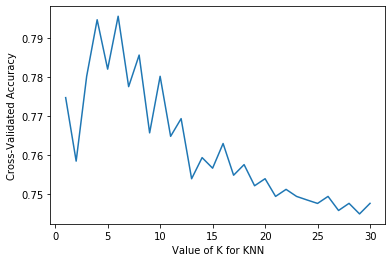

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)  # 优化参数k的取值范围
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')     # 分类
    # loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error')    # 回归
    k_scores.append(scores.mean())

#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV  # 网格搜索和随机搜索

k_range = range(1, 31)   
weight_options = ['uniform', 'distance']   # 代估参数权重的取值范围。uniform为统一取权值，distance表示距离倒数取权值
param_grid = {'n_neighbors':k_range, 'weights':weight_options}  # 定义优化参数字典，字典中的key值必须是分类算法的函数的参数名

# 针对每个参数对进行10次交叉验证,使用准确率为结果的度量指标。可以添加多个度量指标
grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=10, scoring='accuracy') 
grid.fit(X_train, y_train)
 
#print('网格搜索-度量记录：',  grid.cv_results_)      # 包含每次训练的相关信息
print('网格搜索-最佳度量值:', grid.best_score_)      # 获取最佳度量值
print('网格搜索-最佳参数：',  grid.best_params_)     # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',  grid.best_estimator_)  # 获取最佳度量时的分类器模型

网格搜索-最佳度量值: 0.7863636363636364
网格搜索-最佳参数： {'n_neighbors': 4, 'weights': 'uniform'}
网格搜索-最佳模型： KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [17]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

knn.fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)
print(knn_y_predict)  

train_y_score = knn.score(X_train, y_train)
test_y_score = knn.score(X_test, y_test)
print("Accuracy of KNeighborsClassifier(Train): {score}".format(score=train_y_score)) 
print("Accuracy of KNeighborsClassifier(Test): {score}".format(score=test_y_score))

[0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of KNeighborsClassifier(Train): 0.8715909090909091
Accuracy of KNeighborsClassifier(Test): 0.8416289592760181


In [18]:
print(classification_report(y_test, knn_y_predict, target_names=['death', 'non_death']))  # 精确度/召回率/F1值

              precision    recall  f1-score   support

       death       0.72      0.57      0.64        54
   non_death       0.87      0.93      0.90       167

    accuracy                           0.84       221
   macro avg       0.80      0.75      0.77       221
weighted avg       0.83      0.84      0.84       221



In [19]:
print("KNN Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, knn_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, knn_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, knn_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, knn_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, knn_y_predict)))  # 平衡精度

KNN Classifier: 
ACCURACY         : 0.8416289592760181
AUC              : 0.7511088933244622
RECALL           : 0.9281437125748503
PRECISION        : 0.8707865168539326
BALANCED_ACCURACY: 0.7511088933244622


In [20]:
pd.Series(knn_y_predict).value_counts()

1    178
0     43
dtype: int64

In [21]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(knn, X, y, cv=5, scoring=my_score).mean())

0.7901898799561975
0.7640557309462854
0.9175602676771749
0.8147662312676474
0.6934447523741738


## step4:SVC

In [22]:
from sklearn.svm import SVC

svc = SVC(C=2.5, kernel='linear')
svc.fit(X_train, y_train)

svc_y_predict = svc.predict(X_test)
print(svc_y_predict)

y_score = svc.score(X_test, y_test)
print("Accuracy of SVC Classifier: {score}".format(score=y_score))  # 准确率

[0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of SVC Classifier: 0.8506787330316742


In [23]:
import numpy as np
s = np.arange(1.0, 2.5, 0.1)

parameters={'kernel':('rbf', 'linear', 'poly'), 'C':s}
svr = SVC()
grid = GridSearchCV(svr, parameters)
grid.fit(X_train, y_train)

#print('网格搜索-度量记录：',  grid.cv_results_)      # 包含每次训练的相关信息
#print('网格搜索-最佳度量值:', grid.best_score_)      # 获取最佳度量值
#print('网格搜索-最佳参数：',  grid.best_params_)     # 获取最佳度量值时的代定参数的值。是一个字典
print(grid.best_estimator_)

d:\python3.6.0\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account b

d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will chan

d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will chan

d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2.200000000000001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


d:\python3.6.0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
svc = SVC(C=2.2, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
        kernel='linear', max_iter=-1, probability=False, random_state=None,
        shrinking=True, tol=0.001, verbose=False)

svc.fit(X_train, y_train)

svc_y_predict = svc.predict(X_test)
print(svc_y_predict)

train_svc_y_score = svc.score(X_train, y_train)
test_svc_y_score = svc.score(X_test, y_test)

print("Accuracy of SVC Classifier(Train): {score}".format(score=train_svc_y_score))
print("Accuracy of SVC Classifier(Test): {score}".format(score=test_svc_y_score))

[0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of SVC Classifier(Train): 0.85
Accuracy of SVC Classifier(Test): 0.8506787330316742


In [25]:
pd.Series(svc_y_predict).value_counts()

1    180
0     41
dtype: int64

In [26]:
print(classification_report(y_test, svc_y_predict, target_names=['death', 'non_death']))  # 精确度/召回率/F1值

              precision    recall  f1-score   support

       death       0.76      0.57      0.65        54
   non_death       0.87      0.94      0.90       167

    accuracy                           0.85       221
   macro avg       0.81      0.76      0.78       221
weighted avg       0.84      0.85      0.84       221



In [27]:
print("SVC Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, svc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, svc_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, svc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, svc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, svc_y_predict)))  # 平衡精度

SVC Classifier: 
ACCURACY         : 0.8506787330316742
AUC              : 0.7570969172765579
RECALL           : 0.9401197604790419
PRECISION        : 0.8722222222222222
BALANCED_ACCURACY: 0.757096917276558


In [28]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(svc, X, y, cv=5, scoring=my_score).mean())

0.8100993822186409
0.8318542798413693
0.9276949125211644
0.829017873879654
0.7207086953798857


## step5:DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

tree_y_predict = tree.predict(X_test)
print(tree_y_predict)

tree_y_score = tree.score(X_test, y_test)
print("Accuracy of DecisionTreeClassifier: {score}".format(score=tree_y_score))

[1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0]
Accuracy of DecisionTreeClassifier: 0.8461538461538461


In [30]:
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':['gini'], 'min_samples_leaf':[1,2,3,4], 'min_impurity_decrease':[0,0.1,0.2,0.3]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)

#print('网格搜索-度量记录：',  grid.cv_results_)      # 包含每次训练的相关信息
print('网格搜索-最佳度量值:', grid.best_score_)      # 获取最佳度量值
#print('网格搜索-最佳参数：',  grid.best_params_)     # 获取最佳度量值时的代定参数的值。是一个字典
print(grid.best_estimator_)

网格搜索-最佳度量值: 0.8113636363636364
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [36]:
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

tree.fit(X_train, y_train)

tree_y_predict = tree.predict(X_test)
print(tree_y_predict)

train_tree_y_score = tree.score(X_train, y_train)
test_tree_y_score = tree.score(X_test, y_test)
print("Accuracy of DecisionTreeClassifier(Train): {score}".format(score=train_tree_y_score))
print("Accuracy of DecisionTreeClassifier(Test): {score}".format(score=test_tree_y_score))

[1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1]
Accuracy of DecisionTreeClassifier(Train): 1.0
Accuracy of DecisionTreeClassifier(Test): 0.8190045248868778


In [37]:
pd.Series(tree_y_predict).value_counts()

1    157
0     64
dtype: int64

In [38]:
print("DecisionTreeClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, svc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, svc_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, svc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, svc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, svc_y_predict)))  # 平衡精度

DecisionTreeClassifier: 
ACCURACY         : 0.8506787330316742
AUC              : 0.7570969172765579
RECALL           : 0.9401197604790419
PRECISION        : 0.8722222222222222
BALANCED_ACCURACY: 0.757096917276558


In [39]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(tree, X, y, cv=5, scoring=my_score).mean())

0.7782846753032087
0.7360977488433644
0.833741836652423
0.8543686837266531
0.7360977488433645


No handles with labels found to put in legend.


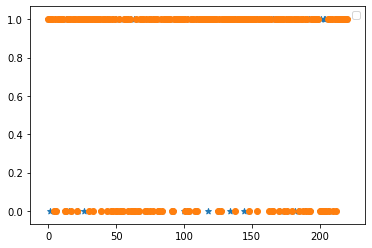

In [40]:
# 画图展示训练结果
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(len(X_test))),y_test,marker='*')
ax.scatter(list(range(len(X_test))),tree_y_predict,marker='o')  # 不管是画散点图还是折现图，都会被挡住
plt.legend()
plt.show()

## step6:RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, random_state=10)
rf.fit(X_train, y_train)
# 随机决策树生成过程采用Boostrap，在一棵树的生成过程并不会使用所有样本，未使用的样本即Out_of_bag袋外样本,
# 通过袋外样本，可以评估这个树的准确度，其他子树叶按这个原理评估，最后取平均值，即是随机森林算法的性能；
print(rf.oob_score_)
#y_predprob = rf.predict_proba(X_train)[:,1]
y_pred = rf.predict(X_train)
print("AUC Score (Train): %f" % roc_auc_score(y_train, y_pred))

rf_y_predict = rf.predict(X_test)
print(rf_y_predict)  

train_rf_y_score = rf.score(X_train, y_train)
test_rf_y_score = rf.score(X_test, y_test)
print("Accuracy of RandomForestClassifier(Train): {score}".format(score=train_rf_y_score)) 
print("Accuracy of RandomForestClassifier(Test): {score}".format(score=test_rf_y_score))

0.7579545454545454
AUC Score (Train): 0.993403
[1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy of RandomForestClassifier(Train): 0.9954545454545455
Accuracy of RandomForestClassifier(Test): 0.8959276018099548


d:\python3.6.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python3.6.0\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python3.6.0\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [42]:
pd.Series(rf_y_predict).value_counts()

1    168
0     53
dtype: int64

In [43]:
print("RandomForestClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, rf_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, rf_y_predict)))            # AUC (在偏态的样本中更稳健)
print("RECALL           : {score}".format(score=recall_score(y_test, rf_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, rf_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, rf_y_predict)))  # 平衡精度

RandomForestClassifier: 
ACCURACY         : 0.8959276018099548
AUC              : 0.8559547571523619
RECALL           : 0.9341317365269461
PRECISION        : 0.9285714285714286
BALANCED_ACCURACY: 0.855954757152362


In [50]:
# 随机森林里决策树的数目 n_estimators
param_test1= {'n_estimators': range(90, 100, 1)}
grid= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100, 
                                                      min_samples_leaf=20, max_depth=8, max_features='sqrt', random_state=10),
                   param_grid = param_test1, scoring='roc_auc', cv=5)

grid.fit(X_train, y_train)
means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid.best_params_, grid.best_score_

0.898100  with:   {'n_estimators': 90}
0.898410  with:   {'n_estimators': 91}
0.898132  with:   {'n_estimators': 92}
0.899001  with:   {'n_estimators': 93}
0.898346  with:   {'n_estimators': 94}
0.897759  with:   {'n_estimators': 95}
0.897695  with:   {'n_estimators': 96}
0.897755  with:   {'n_estimators': 97}
0.897657  with:   {'n_estimators': 98}
0.897533  with:   {'n_estimators': 99}


({'n_estimators': 93}, 0.8990008512360506)

In [53]:
# 决策树最大深度 max_depth、内部节点再划分所需最小样本数 min_samples_split
param_test2= {'max_depth': range(3, 8, 1), 'min_samples_split': range(48, 55, 1)}
grid2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 93,
                                 min_samples_leaf=20, max_features='sqrt', oob_score=True, random_state=10),
                    param_grid = param_test2, scoring='roc_auc', iid=False, cv=5)

grid2.fit(X_train, y_train)
means = grid2.cv_results_['mean_test_score']
params = grid2.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid2.best_params_, grid2.best_score_

0.898398  with:   {'max_depth': 3, 'min_samples_split': 48}
0.898615  with:   {'max_depth': 3, 'min_samples_split': 49}
0.898803  with:   {'max_depth': 3, 'min_samples_split': 50}
0.898712  with:   {'max_depth': 3, 'min_samples_split': 51}
0.899183  with:   {'max_depth': 3, 'min_samples_split': 52}
0.899123  with:   {'max_depth': 3, 'min_samples_split': 53}
0.899304  with:   {'max_depth': 3, 'min_samples_split': 54}
0.899398  with:   {'max_depth': 4, 'min_samples_split': 48}
0.899155  with:   {'max_depth': 4, 'min_samples_split': 49}
0.898975  with:   {'max_depth': 4, 'min_samples_split': 50}
0.899004  with:   {'max_depth': 4, 'min_samples_split': 51}
0.899596  with:   {'max_depth': 4, 'min_samples_split': 52}
0.899505  with:   {'max_depth': 4, 'min_samples_split': 53}
0.899804  with:   {'max_depth': 4, 'min_samples_split': 54}
0.904188  with:   {'max_depth': 5, 'min_samples_split': 48}
0.904594  with:   {'max_depth': 5, 'min_samples_split': 49}
0.904689  with:   {'max_depth': 5, 'min_

({'max_depth': 5, 'min_samples_split': 52}, 0.9058409672553884)

In [54]:
# 在三个最优参数上，查看模型效果
rf1= RandomForestClassifier(n_estimators= 93, max_depth=5, min_samples_split=52,
                                 min_samples_leaf=20, max_features='sqrt', oob_score=True, random_state=10)

rf1.fit(X_train, y_train)
print(rf1.oob_score_)   # 此时袋外分数有一定提高,即模型泛化能力增强

0.8420454545454545


In [55]:
# 对 内部节点再划分所需最小样本数 min_samples_split 和 叶子节点最少样本数 min_samples_leaf 一起调参
param_test3= {'min_samples_split': range(48, 55, 1), 'min_samples_leaf': range(5, 15, 1)}
grid3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 93, max_depth=5,
                                                       max_features='sqrt', oob_score=True, random_state=10),
                    param_grid = param_test3, scoring='roc_auc', iid=False, cv=5)

grid3.fit(X_train, y_train)
means = grid3.cv_results_['mean_test_score']
params = grid3.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid3.best_params_, grid3.best_score_

0.900645  with:   {'min_samples_leaf': 5, 'min_samples_split': 48}
0.899838  with:   {'min_samples_leaf': 5, 'min_samples_split': 49}
0.900425  with:   {'min_samples_leaf': 5, 'min_samples_split': 50}
0.900676  with:   {'min_samples_leaf': 5, 'min_samples_split': 51}
0.900995  with:   {'min_samples_leaf': 5, 'min_samples_split': 52}
0.900351  with:   {'min_samples_leaf': 5, 'min_samples_split': 53}
0.900381  with:   {'min_samples_leaf': 5, 'min_samples_split': 54}
0.900581  with:   {'min_samples_leaf': 6, 'min_samples_split': 48}
0.899779  with:   {'min_samples_leaf': 6, 'min_samples_split': 49}
0.900920  with:   {'min_samples_leaf': 6, 'min_samples_split': 50}
0.900121  with:   {'min_samples_leaf': 6, 'min_samples_split': 51}
0.900653  with:   {'min_samples_leaf': 6, 'min_samples_split': 52}
0.900376  with:   {'min_samples_leaf': 6, 'min_samples_split': 53}
0.900628  with:   {'min_samples_leaf': 6, 'min_samples_split': 54}
0.901225  with:   {'min_samples_leaf': 7, 'min_samples_split':

({'min_samples_leaf': 14, 'min_samples_split': 53}, 0.9036213204884932)

In [57]:
# 最大特征数 max_features
param_test4= {'max_features': range(5, 20, 2)}
grid4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 93, max_depth=5, min_samples_split=53,
                                                       min_samples_leaf=14, oob_score=True, random_state=10),
                    param_grid = param_test4, scoring='roc_auc', iid=False, cv=5)

grid4.fit(X_train, y_train)
means = grid4.cv_results_['mean_test_score']
params = grid4.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid4.best_params_, grid4.best_score_

0.897348  with:   {'max_features': 5}
0.902034  with:   {'max_features': 7}
0.896422  with:   {'max_features': 9}
0.897112  with:   {'max_features': 11}
0.900755  with:   {'max_features': 13}
0.897950  with:   {'max_features': 15}
0.899647  with:   {'max_features': 17}
0.900252  with:   {'max_features': 19}


({'max_features': 7}, 0.902034359947453)

In [60]:
rf = RandomForestClassifier(n_estimators= 93, max_depth=5, min_samples_split=53,
                            min_samples_leaf=14, max_features='sqrt', oob_score=True, random_state=10)

rf.fit(X_train, y_train)
print(rf.oob_score_)

y_pred = rf.predict(X_train)
print("AUC Score (Train): %f" % roc_auc_score(y_train, y_pred))

rf_y_predict = rf.predict(X_test)
print(rf_y_predict)  

train_rf_y_score = rf.score(X_train, y_train)
test_rf_y_score = rf.score(X_test, y_test)
print("Accuracy of RandomForestClassifier(Train): {score}".format(score=train_rf_y_score)) 
print("Accuracy of RandomForestClassifier(Test): {score}".format(score=test_rf_y_score))

0.8397727272727272
AUC Score (Train): 0.814342
[1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy of RandomForestClassifier(Train): 0.884090909090909
Accuracy of RandomForestClassifier(Test): 0.9140271493212669


In [61]:
pd.Series(rf_y_predict).value_counts()

1    182
0     39
dtype: int64

In [62]:
print("RandomForestClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, rf_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, rf_y_predict)))            # AUC (在偏态的样本中更稳健)
print("RECALL           : {score}".format(score=recall_score(y_test, rf_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, rf_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, rf_y_predict)))  # 平衡精度

RandomForestClassifier: 
ACCURACY         : 0.9140271493212669
AUC              : 0.8366045686404968
RECALL           : 0.9880239520958084
PRECISION        : 0.9065934065934066
BALANCED_ACCURACY: 0.8366045686404968


In [63]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(rf, X, y, cv=5, scoring=my_score).mean())

0.8427777433418046
0.8933137346525886
0.9695476900749819
0.8382684952980611
0.746448192195709


In [ ]:
# 筛选出重要性较高的变量
threshold = 0.0002
x_selected = x_train[:, importances > threshold]
x_selected.shape

## step7:AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

adc = AdaBoostClassifier(base_estimator=None, n_estimators=97, learning_rate=1.0, algorithm='SAMME.R', random_state=10)

adc.fit(X_train, y_train)

adc_y_predict = adc.predict(X_test)
print(adc_y_predict)

#pro = abc.predict_proba(X_test)
#print(pro)

train_adc_y_score = adc.score(X_train, y_train)
test_adc_y_score = adc.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_adc_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_adc_y_score)) 

[1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy of AdaBoostClassifier(Train): 0.9954545454545455
Accuracy of AdaBoostClassifier(Test): 0.9004524886877828


In [75]:
print("AdaBoostClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, adc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, adc_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, adc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, adc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, adc_y_predict)))  # 平衡精度

AdaBoostClassifier: 
ACCURACY         : 0.9004524886877828
AUC              : 0.8589487691284098
RECALL           : 0.9401197604790419
PRECISION        : 0.9289940828402367
BALANCED_ACCURACY: 0.8589487691284099


In [76]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(adc, X, y, cv=5, scoring=my_score).mean())

0.8564433149445236
0.8966958673551512
0.9099088930097559
0.8921422223702529
0.8157839395924356


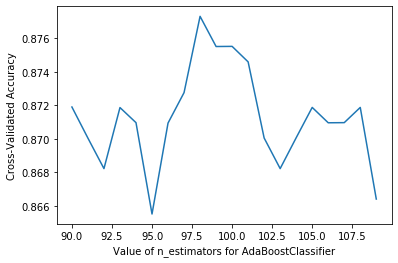

In [68]:
n_estimators = range(90, 110, 1)  # 优化参数k的取值范围
k_scores = []
for k in n_estimators:
    ab = AdaBoostClassifier(n_estimators=k)
    scores = cross_val_score(ab, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

#可视化数据
plt.plot(n_estimators, k_scores)
plt.xlabel('Value of n_estimators for AdaBoostClassifier')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## step8:GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=10)

gbc.fit(X_train, y_train)

gdc_y_predict = gbc.predict(X_test)
print(gdc_y_predict)

#pro = abc.predict_proba(X_test)
#print(pro)

train_gdc_y_score = gbc.score(X_train, y_train)
test_gdc_y_score = gbc.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_gdc_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_gdc_y_score))

[1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy of AdaBoostClassifier(Train): 0.9954545454545455
Accuracy of AdaBoostClassifier(Test): 0.9321266968325792


In [78]:
print("GradientBoostingClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gdc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gdc_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gdc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gdc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gdc_y_predict)))  # 平衡精度

GradientBoostingClassifier: 
ACCURACY         : 0.9321266968325792
AUC              : 0.8736416056775339
RECALL           : 0.9880239520958084
PRECISION        : 0.9269662921348315
BALANCED_ACCURACY: 0.8736416056775338


In [79]:
param_test1 = {'n_estimators':range(102, 120, 2)}
grid1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20, max_depth=8, max_features='sqrt', random_state=10), 
                     param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)

grid1.fit(X_train, y_train)
means = grid1.cv_results_['mean_test_score']
params = grid1.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid1.best_params_, grid1.best_score_

0.922084  with:   {'n_estimators': 102}
0.923019  with:   {'n_estimators': 104}
0.924856  with:   {'n_estimators': 106}
0.924949  with:   {'n_estimators': 108}
0.925132  with:   {'n_estimators': 110}
0.925099  with:   {'n_estimators': 112}
0.925782  with:   {'n_estimators': 114}
0.925437  with:   {'n_estimators': 116}
0.925036  with:   {'n_estimators': 118}


({'n_estimators': 114}, 0.9257824794433903)

In [80]:
param_test2 = {'max_depth': range(7, 12, 1), 'min_samples_split': range(74, 79, 1)}
grid2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=114, min_samples_leaf=20, 
                                                                max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='roc_auc', iid=False, cv=5)

grid2.fit(X_train, y_train)
means = grid2.cv_results_['mean_test_score']
params = grid2.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid2.best_params_, grid2.best_score_

0.925168  with:   {'max_depth': 7, 'min_samples_split': 74}
0.928723  with:   {'max_depth': 7, 'min_samples_split': 75}
0.922897  with:   {'max_depth': 7, 'min_samples_split': 76}
0.927607  with:   {'max_depth': 7, 'min_samples_split': 77}
0.922318  with:   {'max_depth': 7, 'min_samples_split': 78}
0.922555  with:   {'max_depth': 8, 'min_samples_split': 74}
0.923642  with:   {'max_depth': 8, 'min_samples_split': 75}
0.926173  with:   {'max_depth': 8, 'min_samples_split': 76}
0.928218  with:   {'max_depth': 8, 'min_samples_split': 77}
0.924266  with:   {'max_depth': 8, 'min_samples_split': 78}
0.920891  with:   {'max_depth': 9, 'min_samples_split': 74}
0.927466  with:   {'max_depth': 9, 'min_samples_split': 75}
0.925880  with:   {'max_depth': 9, 'min_samples_split': 76}
0.928559  with:   {'max_depth': 9, 'min_samples_split': 77}
0.924764  with:   {'max_depth': 9, 'min_samples_split': 78}
0.923772  with:   {'max_depth': 10, 'min_samples_split': 74}
0.925962  with:   {'max_depth': 10, 'mi

({'max_depth': 11, 'min_samples_split': 75}, 0.9288187223276407)

In [83]:
param_test3 = {'min_samples_split': range(48, 54, 1), 'min_samples_leaf': range(52, 56, 1)}
grid3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=114, max_depth=11,
                                                             max_features='sqrt', random_state=10), 
                       param_grid = param_test3, scoring='roc_auc', iid=False, cv=5)

grid3.fit(X_train, y_train)
means = grid3.cv_results_['mean_test_score']
params = grid3.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))
    

grid3.best_params_, grid3.best_score_

0.927401  with:   {'min_samples_leaf': 52, 'min_samples_split': 48}
0.927401  with:   {'min_samples_leaf': 52, 'min_samples_split': 49}
0.927401  with:   {'min_samples_leaf': 52, 'min_samples_split': 50}
0.927401  with:   {'min_samples_leaf': 52, 'min_samples_split': 51}
0.927401  with:   {'min_samples_leaf': 52, 'min_samples_split': 52}
0.927401  with:   {'min_samples_leaf': 52, 'min_samples_split': 53}
0.930680  with:   {'min_samples_leaf': 53, 'min_samples_split': 48}
0.930680  with:   {'min_samples_leaf': 53, 'min_samples_split': 49}
0.930680  with:   {'min_samples_leaf': 53, 'min_samples_split': 50}
0.930680  with:   {'min_samples_leaf': 53, 'min_samples_split': 51}
0.930680  with:   {'min_samples_leaf': 53, 'min_samples_split': 52}
0.930680  with:   {'min_samples_leaf': 53, 'min_samples_split': 53}
0.932722  with:   {'min_samples_leaf': 54, 'min_samples_split': 48}
0.932722  with:   {'min_samples_leaf': 54, 'min_samples_split': 49}
0.932722  with:   {'min_samples_leaf': 54, 'min_

({'min_samples_leaf': 54, 'min_samples_split': 48}, 0.9327219870578505)

In [84]:
param_test4 = {'max_features': range(8, 13, 1)}
grid4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=114, max_depth=11, min_samples_leaf =54, 
                                                            min_samples_split=48, random_state=10), 
                     param_grid = param_test4, scoring='roc_auc', iid=False, cv=5)

grid4.fit(X_train, y_train)
means = grid4.cv_results_['mean_test_score']
params = grid4.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid4.best_params_, grid4.best_score_

0.931558  with:   {'max_features': 8}
0.928811  with:   {'max_features': 9}
0.932722  with:   {'max_features': 10}
0.929946  with:   {'max_features': 11}
0.925223  with:   {'max_features': 12}


({'max_features': 10}, 0.9327219870578505)

In [86]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=114, max_depth=11, max_features=10, 
                                  min_samples_leaf=54, min_samples_split=48, random_state=10)

gbc.fit(X_train, y_train)

gdc_y_predict = gbc.predict(X_test)
print(gdc_y_predict)

#pro = abc.predict_proba(X_test)
#print(pro)

train_gdc_y_score = gbc.score(X_train, y_train)
test_gdc_y_score = gbc.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_gdc_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_gdc_y_score))

[1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy of AdaBoostClassifier(Train): 1.0
Accuracy of AdaBoostClassifier(Test): 0.9366515837104072


In [87]:
print("GradientBoostingClassifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gdc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gdc_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gdc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gdc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gdc_y_predict)))  # 平衡精度

GradientBoostingClassifier: 
ACCURACY         : 0.9366515837104072
AUC              : 0.8954313595032158
RECALL           : 0.9760479041916168
PRECISION        : 0.9421965317919075
BALANCED_ACCURACY: 0.8954313595032157


In [88]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(gbc, X, y, cv=5, scoring=my_score).mean())

0.877241265315399
0.9224822967239603
0.949230024993953
0.8890417460204298
0.8224388732240631


## step9:NB

In [89]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_y_predict = gnb.predict(X_test)
print(gnb_y_predict)

#pro = gnb.predict_proba(X_test)
#print(pro)

train_gnb_y_score = gnb.score(X_train, y_train)
test_gnb_y_score = gnb.score(X_test, y_test)
print("Accuracy of AdaBoostClassifier(Train): {score}".format(score=train_gnb_y_score)) 
print("Accuracy of AdaBoostClassifier(Test): {score}".format(score=test_gnb_y_score)) 

[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
Accuracy of AdaBoostClassifier(Train): 0.7897727272727273
Accuracy of AdaBoostClassifier(Test): 0.7873303167420814


In [90]:
print("GaussianNB: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gnb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gnb_y_predict)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gnb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gnb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gnb_y_predict)))  # 平衡精度

GaussianNB: 
ACCURACY         : 0.7873303167420814
AUC              : 0.7527722333111555
RECALL           : 0.8203592814371258
PRECISION        : 0.8896103896103896
BALANCED_ACCURACY: 0.7527722333111555


In [91]:
# 五折交叉验证
for my_score in ['accuracy', 'roc_auc', 'recall', 'precision', 'balanced_accuracy']:
        print(cross_val_score(gnb, X, y, cv=5, scoring=my_score).mean())

0.7746069133659788
0.8036104502738487
0.8667499798435863
0.8288624065943277
0.7044963416883062


## step10:ANN

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers.core import Activation, Dense
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.model_selection import GridSearchCV
from keras.wrappers import scikit_learn

# split train and validate
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

d:\python3.6.0\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
d:\python3.6.0\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python3.6.0\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python3.6.0\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (t

In [94]:
# 模型创建函数，KerasClassifier需要这个函数
def create_model():
    
    model = Sequential()
    model.add(Dense(input_dim=100, units=32))
    model.add(Activation('relu'))
    #model.add(Dropout(dropout))
    model.add(Dense(input_dim=32, units=8))
    model.add(Activation('sigmoid'))

    model.add(Dense(input_dim=8, units=1))
    model.add(Activation('sigmoid'))
    # 编译
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 创建模型
model = scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

# 设置参数候选值
batch_size = [8,10,12,14,16]
epochs = [30,40,50,60]

# 创建GridSearchCV，并训练
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']
for mean,param in zip(means, params):
    print("%f  with:   %r" % (mean, param))

grid.best_params_, grid.best_score_

0.833364  with:   {'batch_size': 8, 'epochs': 30}
0.826440  with:   {'batch_size': 8, 'epochs': 40}
0.822628  with:   {'batch_size': 8, 'epochs': 50}
0.818822  with:   {'batch_size': 8, 'epochs': 60}
0.827835  with:   {'batch_size': 10, 'epochs': 30}
0.828245  with:   {'batch_size': 10, 'epochs': 40}
0.824779  with:   {'batch_size': 10, 'epochs': 50}
0.821873  with:   {'batch_size': 10, 'epochs': 60}
0.825774  with:   {'batch_size': 12, 'epochs': 30}
0.827900  with:   {'batch_size': 12, 'epochs': 40}
0.822684  with:   {'batch_size': 12, 'epochs': 50}
0.821064  with:   {'batch_size': 12, 'epochs': 60}
0.832239  with:   {'batch_size': 14, 'epochs': 30}
0.836890  with:   {'batch_size': 14, 'epochs': 40}
0.834589  with:   {'batch_size': 14, 'epochs': 50}
0.825459  with:   {'batch_size': 14, 'epochs': 60}
0.829587  with:   {'batch_size': 16, 'epochs': 30}
0.828693  with:   {'batch_size': 16, 'epochs': 40}
0.828573  with:   {'batch_size': 16, 'epochs': 50}
0.833857  with:   {'batch_size': 16

({'batch_size': 14, 'epochs': 40}, 0.8368903869166185)

In [100]:
# 建立神经网络模型
model = Sequential()
model.add(Dense(input_dim=100, units=64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(input_dim=64, units=16))
model.add(Activation('relu'))
model.add(Dense(input_dim=16, units=1))
model.add(Activation('sigmoid'))
# 编译
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Starting training ")
history = model.fit(X_train, y_train, epochs=100, batch_size=14, validation_data=(X_val, y_val))
print("Training finished \n")

nn_y_predict = model.predict_classes(X_test).reshape(len(y_test))


Starting training 
Train on 704 samples, validate on 176 samples
Epoch 1/100
704/704 [==============================] - 4s 5ms/step - loss: 0.6782 - acc: 0.6179 - val_loss: 0.6163 - val_acc: 0.6932
Epoch 2/100
704/704 [==============================] - 0s 308us/step - loss: 0.5837 - acc: 0.7131 - val_loss: 0.5663 - val_acc: 0.7045
Epoch 3/100
704/704 [==============================] - 0s 355us/step - loss: 0.5317 - acc: 0.7401 - val_loss: 0.5204 - val_acc: 0.7614
Epoch 4/100
704/704 [==============================] - 0s 328us/step - loss: 0.4925 - acc: 0.7741 - val_loss: 0.5003 - val_acc: 0.7841
Epoch 5/100
704/704 [==============================] - 0s 307us/step - loss: 0.4766 - acc: 0.7798 - val_loss: 0.4950 - val_acc: 0.7670
Epoch 6/100
704/704 [==============================] - 0s 331us/step - loss: 0.4556 - acc: 0.7955 - val_loss: 0.5147 - val_acc: 0.7727
Epoch 7/100
704/704 [==============================] - 0s 354us/step - loss: 0.4438 - acc: 0.7955 - val_loss: 0.4945 - val_acc:

Epoch 61/100
704/704 [==============================] - 0s 322us/step - loss: 0.2065 - acc: 0.9162 - val_loss: 0.4810 - val_acc: 0.8068
Epoch 62/100
704/704 [==============================] - 0s 340us/step - loss: 0.2141 - acc: 0.9219 - val_loss: 0.4797 - val_acc: 0.7841
Epoch 63/100
704/704 [==============================] - 0s 368us/step - loss: 0.1981 - acc: 0.9261 - val_loss: 0.4878 - val_acc: 0.8239
Epoch 64/100
704/704 [==============================] - 0s 330us/step - loss: 0.2116 - acc: 0.9148 - val_loss: 0.4798 - val_acc: 0.8011
Epoch 65/100
704/704 [==============================] - 0s 316us/step - loss: 0.1948 - acc: 0.9332 - val_loss: 0.5074 - val_acc: 0.8125
Epoch 66/100
704/704 [==============================] - 0s 311us/step - loss: 0.1931 - acc: 0.9219 - val_loss: 0.4918 - val_acc: 0.8239
Epoch 67/100
704/704 [==============================] - 0s 335us/step - loss: 0.1917 - acc: 0.9205 - val_loss: 0.5093 - val_acc: 0.8011
Epoch 68/100
704/704 [==========================

In [101]:
# testing accuracy
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

704/704 [==============================] - 0s 129us/step
Training Accuracy: 98.72%

221/221 [==============================] - 0s 204us/step
Testing Accuracy: 80.54%



In [102]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

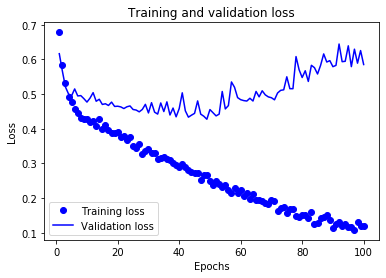

In [103]:
# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


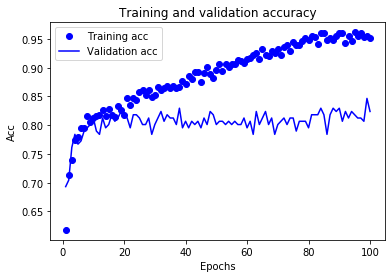

In [104]:
# acc
# plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
# plt.savefig('model loss and accuracy.png')

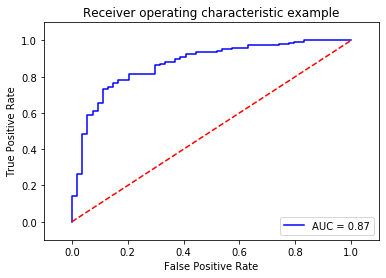

In [105]:
# ROC曲线
y_test_pred_probs = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
roc_auc = auc(fpr, tpr)  # auc为Roc曲线下的面积

plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate') # 横坐标是fpr
plt.ylabel('True Positive Rate')  # 纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()
# plt.savefig('roc.png')

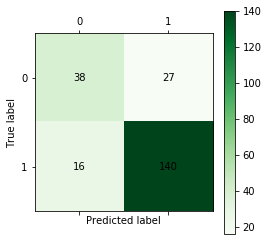

In [106]:
def cm_plot(y, yp):
        cm = confusion_matrix(y, yp)

        plt.matshow(cm, cmap=plt.cm.Greens)
        plt.colorbar()

        for x in range(len(cm)):
            for y in range(len(cm)):
                plt.annotate(
                    cm[x, y],
                    xy=(x, y),
                    horizontalalignment='center',
                    verticalalignment='center')

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return plt

cm_plot(y_test, nn_y_predict).show()

## step11: lightgbm

In [6]:
# Parameters
params = {"objective": "binary", 
          "boosting": "gbdt",
          "metric": {"binary_logloss", "auc"},
          "max_depth": 2,
          "n_jobs":-1,
          "verbose":-1}

num_folds = 5
roc_auc = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
pred_on_test = np.zeros(X_test.shape[0])


kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2020)
for index, (train_index, valid_index) in enumerate(kf.split(X=X_train, y=y_train)):
    print(f"FOLD {index+1}")

    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_fold, y_valid_fold = X_train.iloc[valid_index], y_train.iloc[valid_index]

    dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

    lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

    feature_importances[f'fold_{index + 1}'] = lgb.feature_importance()

    y_valid_pred = (lgb.predict(X_valid_fold, num_iteration=lgb.best_iteration))
    pred_on_test += (lgb.predict(X_test, num_iteration=lgb.best_iteration)) / num_folds

    # winsorization
    y_valid_pred = np.clip(a=y_valid_pred, a_min=0, a_max=1)
    pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)

    print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred),5)}")
    roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred)/num_folds)
    
print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc),5)}")

FOLD 1
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.046248	training's auc: 1	valid_1's binary_logloss: 0.33364	valid_1's auc: 0.924286
[500]	training's binary_logloss: 0.00885741	training's auc: 1	valid_1's binary_logloss: 0.373279	valid_1's auc: 0.92873
Early stopping, best iteration is:
[97]	training's binary_logloss: 0.142575	training's auc: 0.998046	valid_1's binary_logloss: 0.313771	valid_1's auc: 0.925873
FOLD 1: ROC_AUC  => 0.92587
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0464549	training's auc: 1	valid_1's binary_logloss: 0.277646	valid_1's auc: 0.945714
[500]	training's binary_logloss: 0.00954711	training's auc: 1	valid_1's binary_logloss: 0.318901	valid_1's auc: 0.944286
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.0597088	training's auc: 1	valid_1's binary_logloss: 0.2719	valid_1's auc: 0.946984
FOLD 2: ROC_AUC  => 0.94698
FOLD 3
Trainin

In [7]:
# 导出结果  
threshold = 0.5
lgb_y_predict = []

for pred in pred_on_test:  
    result = 1 if pred > threshold else 0
    lgb_y_predict.append(result)

In [8]:
print(lgb_y_predict)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


In [9]:
pd.Series(lgb_y_predict).value_counts()

1    170
0     51
dtype: int64

In [10]:
print("lightgbm: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lgb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, pred_on_test)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lgb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lgb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lgb_y_predict)))  # 平衡精度

lightgbm: 
ACCURACY         : 0.9004524886877828
AUC              : 0.9488647779787022
RECALL           : 0.9683544303797469
PRECISION        : 0.9
BALANCED_ACCURACY: 0.8492565802692384


In [11]:
def plot_feature_importance(df, k_fold_object):
    df['average_feature_imp'] = df[['fold_{}'.format(fold + 1) for fold in range(k_fold_object.n_splits)]].mean(axis=1)
    plt.figure(figsize=(10, 40))
    sns.barplot(data=df.sort_values(by='average_feature_imp', ascending=False), x='average_feature_imp', y='feature');
    plt.title('Feature importance over {} folds average'.format(k_fold_object.n_splits))
    plt.show()

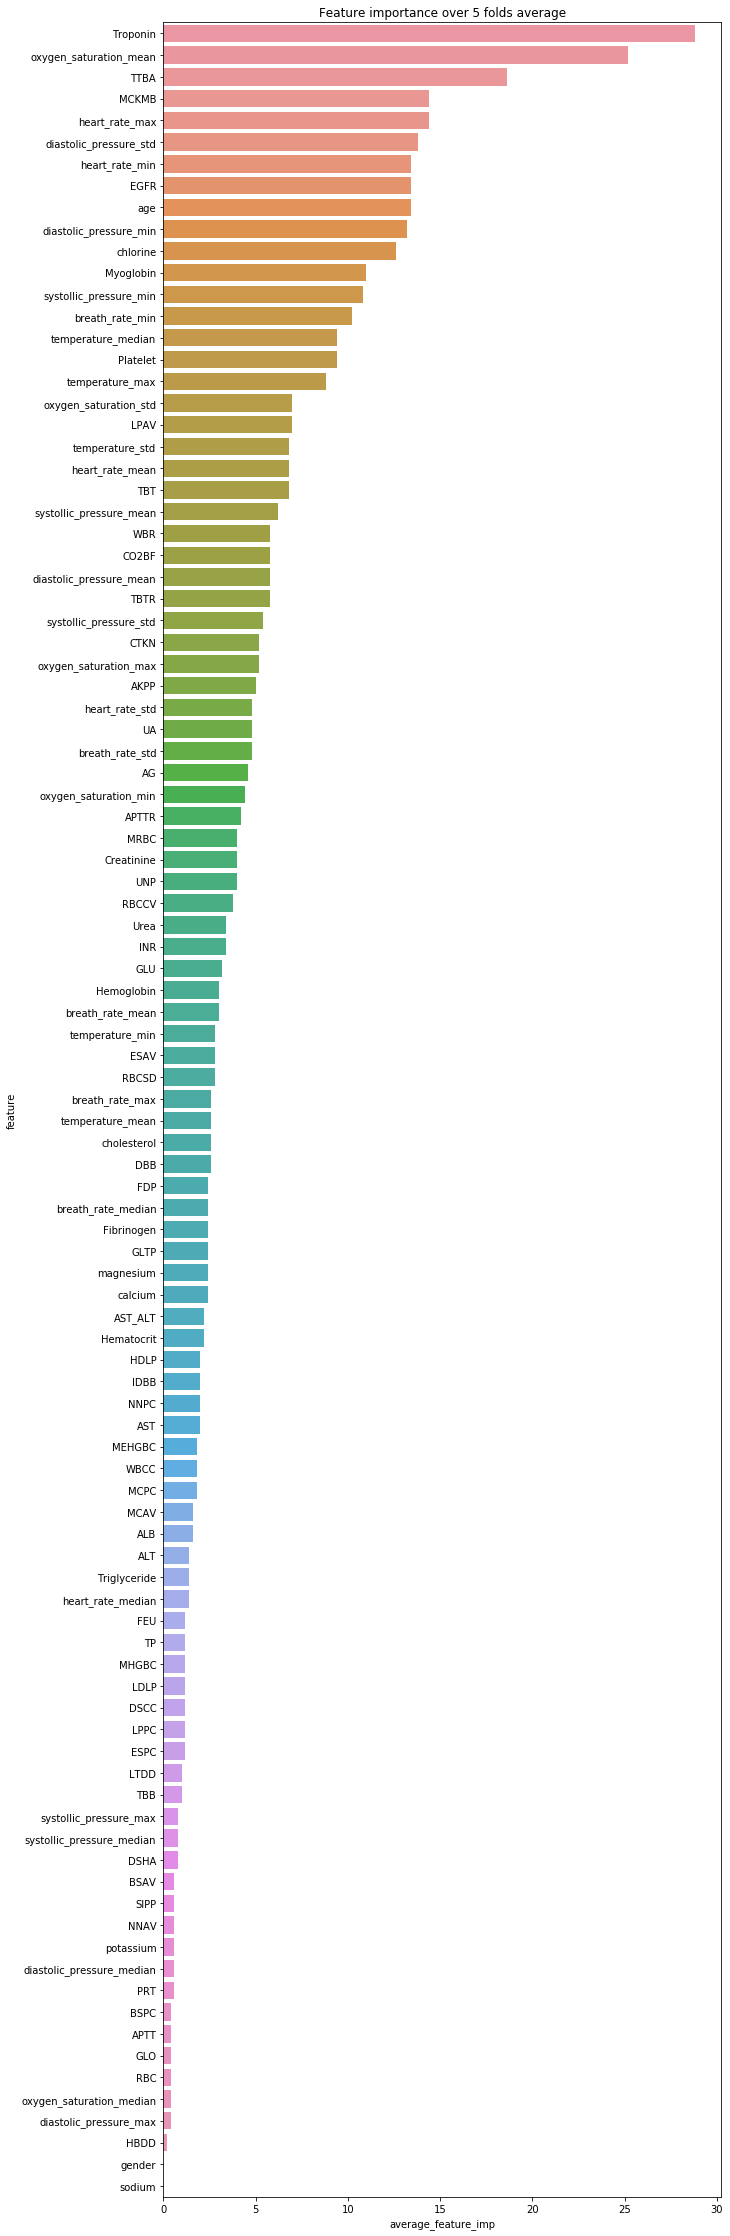

In [12]:
plot_feature_importance(df=feature_importances, k_fold_object=kf)